<a href="https://colab.research.google.com/github/ArcanjoMJA/Fonteira_eficiente/blob/main/Analises_de_Risco_fronteira_(1)_(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Grupos de até 5 alunos
# Escolher Ações de 5 setores
# Cada setor 4 ações
# ppt com as conclusões no max 10 slides

In [ ]:
# Load Packages
!pip install yfinance
import numpy as np
import pandas as pd
#from pandas_datareader import data
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline

In [ ]:
# Import data
df = yf.download(['MRNA', 'PFE', 'BNTX', 'TDOC'],start='2020-03-01', end='2023-05-05')
#df = yf.download(['ITUB4.SA', 'VALE3.SA', 'MGLU3.SA', 'B3SA3.SA'],start='2018-01-01', end='2023-05-25')
df.head()

[*********************100%***********************]  4 of 4 completed


Adj Close                                        Close             \
                 BNTX       MRNA        PFE        TDOC       BNTX       MRNA   
Date                                                                            
2020-03-02  36.121563  29.879999  29.347408  124.489998  36.599998  29.879999   
2020-03-03  37.976990  27.910000  28.859407  123.580002  38.480000  27.910000   
2020-03-04  38.677708  27.490000  30.626316  124.639999  39.189999  27.490000   
2020-03-05  36.634766  28.010000  29.835413  134.330002  37.119999  28.010000   
2020-03-06  37.592087  29.610001  29.465204  135.899994  38.090000  29.610001   

                                        High             ...        Low  \
                  PFE        TDOC       BNTX       MRNA  ...        PFE   
Date                                                     ...              
2020-03-02  33.092979  124.489998  36.599998  30.750000  ...  31.736242   
2020-03-03  32.542694  123.580002  40.998001  28.600000  ...  32.125237   
2020-03-04  34.535103  124.639999  39.299999  28.719999  ...  33.159393   
2020-03-05  33.643265  134.330002  38.060001  28.950001  ...  33.358635   
2020-03-06  33.225807  135.899994  40.945999  29.799999  ...  32.371918   

                             Open                                    Volume  \
                  TDOC       BNTX       MRNA        PFE        TDOC    BNTX   
Date                                                                          
2020-03-02  121.059998  35.009998  27.000000  32.172676  126.940002  185100   
2020-03-03  119.370003  36.650002  27.804001  33.377609  124.500000  297900   
2020-03-04  122.589996  39.000000  27.990000  33.301708  125.169998  127100   
2020-03-05  122.760002  37.709999  27.490000  33.823528  123.400002   77000   
2020-03-06  132.360001  37.619999  27.980000  32.922199  139.029999  279200   

                                         
                MRNA       PFE     TDOC  
Date                                     
2020-03-02  33084000  42034469  2969900  
2020-03-03  17599100  46174475  2242300  
2020-03-04  11817700  38712155  2355900  
2020-03-05  14670000  35096303  4000300  
2020-03-06  21097500  40931036  4198500  

[5 rows x 24 columns]

In [ ]:
# Closing price
df = df['Adj Close'].dropna()
df.head()

,BNTX,MRNA,PFE,TDOC
Date,,,,
2020-03-02,36.121563,29.879999,29.347408,124.489998
2020-03-03,37.976990,27.910000,28.859407,123.580002
2020-03-04,38.677708,27.490000,30.626316,124.639999
2020-03-05,36.634766,28.010000,29.835413,134.330002
2020-03-06,37.592087,29.610001,29.465204,135.899994


In [ ]:
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

,BNTX,MRNA,PFE,TDOC
BNTX,1.000000,0.592562,0.358258,0.210770
MRNA,0.592562,1.000000,0.206645,0.286796
PFE,0.358258,0.206645,1.000000,0.069080
TDOC,0.210770,0.286796,0.069080,1.000000


In [ ]:
# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

BNTX    0.489794
MRNA    0.295402
PFE     0.105272
TDOC   -0.405195
dtype: float64

In [ ]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

BNTX    0.894975
MRNA    0.788990
PFE     0.290251
TDOC    0.727029
dtype: float64

In [ ]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets

,0,1
BNTX,0.489794,0.894975
MRNA,0.295402,0.788990
PFE,0.105272,0.290251
TDOC,-0.405195,0.727029


In [ ]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [ ]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its
                                      # weights
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [ ]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [ ]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,BNTX weight,MRNA weight,PFE weight,TDOC weight
0,0.150388,0.548569,0.292554,0.314943,0.143207,0.249296
1,0.231561,0.658820,0.173166,0.656530,0.042728,0.127576
2,0.163810,0.441968,0.089480,0.400767,0.407754,0.101999
3,0.054964,0.465425,0.143503,0.285142,0.258499,0.312856
4,-0.167143,0.568436,0.094554,0.155725,0.086836,0.662885


<Axes: xlabel='Volatility', ylabel='Returns'>

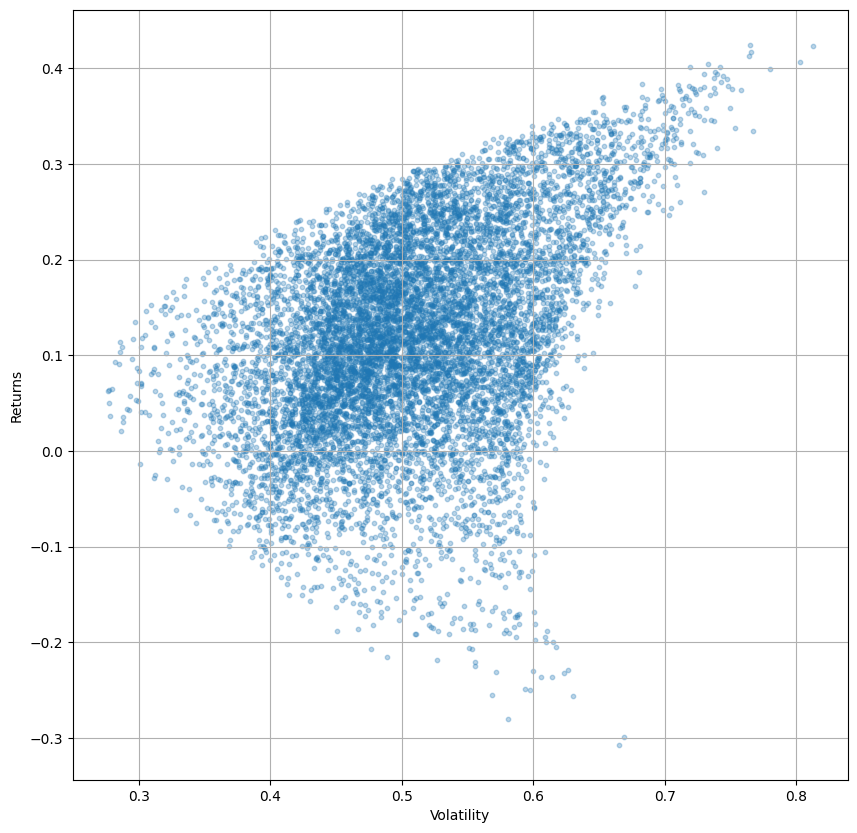

In [ ]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [ ]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.
min_vol_port

Returns        0.062501
Volatility     0.276591
BNTX weight    0.000052
MRNA weight    0.002999
PFE weight     0.912006
TDOC weight    0.084944
Name: 4036, dtype: float64

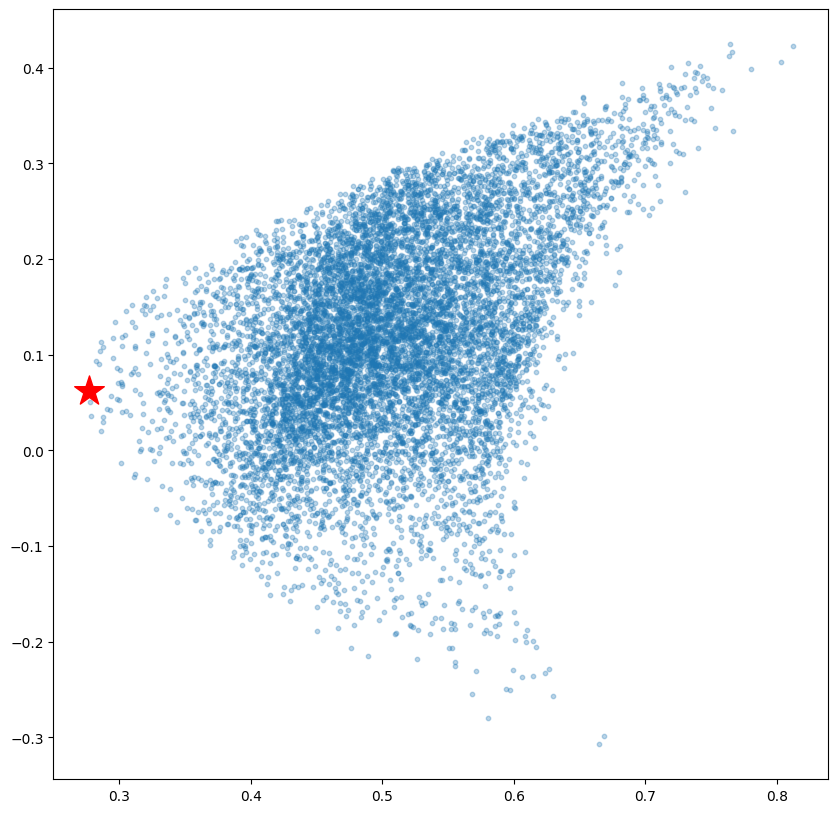

In [ ]:
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

In [ ]:
# Finding the optimal portfolio
rf = 0.1375 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns        0.424637
Volatility     0.764649
BNTX weight    0.810861
MRNA weight    0.048372
PFE weight     0.137581
TDOC weight    0.003185
Name: 1958, dtype: float64

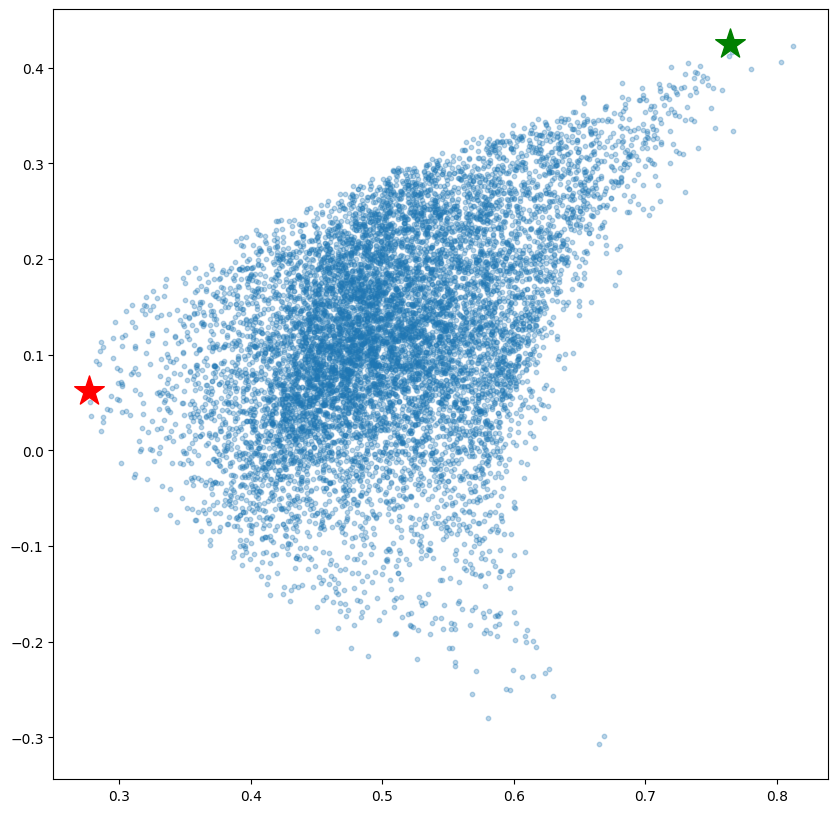

In [ ]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)